In [11]:
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
import datetime as dt
#by default matplot lib plots everything outside the notebook, to keep it inline, use this line
%matplotlib inline

## The .plot() Method

In [12]:
stk = data.DataReader(name="GOOG",data_source="yahoo", start=dt.date(2000, 1, 1), end=dt.datetime.now())
stk.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813286,49.982655,44871300.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942800.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342800.0,54.495735


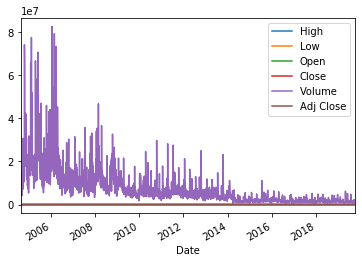

In [13]:
stk.plot()

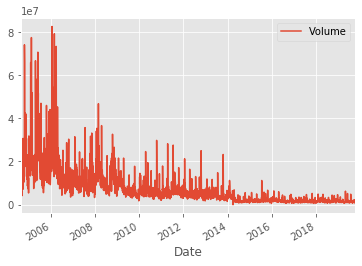

In [21]:
#to specify a specific value as y axis
stk.plot(y="Volume")

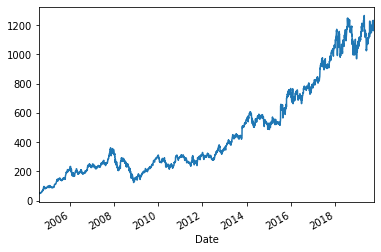

In [15]:
#another way
stk["Low"].plot()

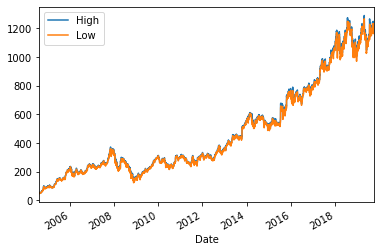

In [16]:
stk[["High", "Low"]].plot()


## Modifying Aestheticswith Templates

In [17]:
stk = data.DataReader(name="GOOG",data_source="yahoo", start=dt.date(2000, 1, 1), end=dt.datetime.now())
stk.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813286,49.982655,44871300.0,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942800.0,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342800.0,54.495735


In [22]:
plt.style.available #see all the available templates for plotting in python

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

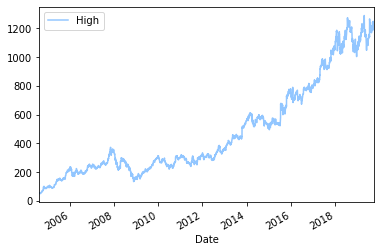

In [19]:
plt.style.use("seaborn-pastel") #changes the settings for the entire notebook
stk.plot(y="High")

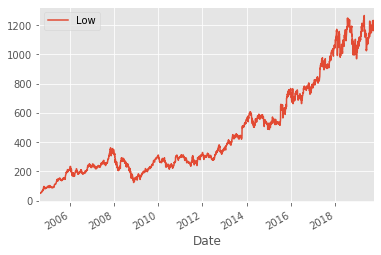

In [20]:
plt.style.use("ggplot") #changes the settings for the entire notebook; This is more popular
stk.plot(y="Low")

## Bar Graphs

In [26]:
google = data.DataReader(name = "GOOG", data_source = "yahoo", start ="2004-01-01", end="2010-12-31")
google.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2004-08-19,51.835709,47.800831,49.813286,49.982655,44871300,49.982655
2004-08-20,54.336334,50.062355,50.316402,53.952770,22942800,53.952770
2004-08-23,56.528118,54.321388,55.168217,54.495735,18342800,54.495735


In [29]:
#create a costume function
def rank_performance(stock_price):
    if stock_price <= 200:
        return "Poor"
    elif stock_price > 200 and stock_price <=500:
        return "satisfactory"
    else:
        return "Stellar"

In [31]:
#apply the costume function to the stock_price column using the apply() function
google["Stock Ranking"] = google["Close"].apply(rank_performance)

In [34]:
#apply the value_count method to the results of the costume function; This is good for bar graphs
google["Stock Ranking"].value_counts()

satisfactory    1010
Poor             595
Name: Stock Ranking, dtype: int64

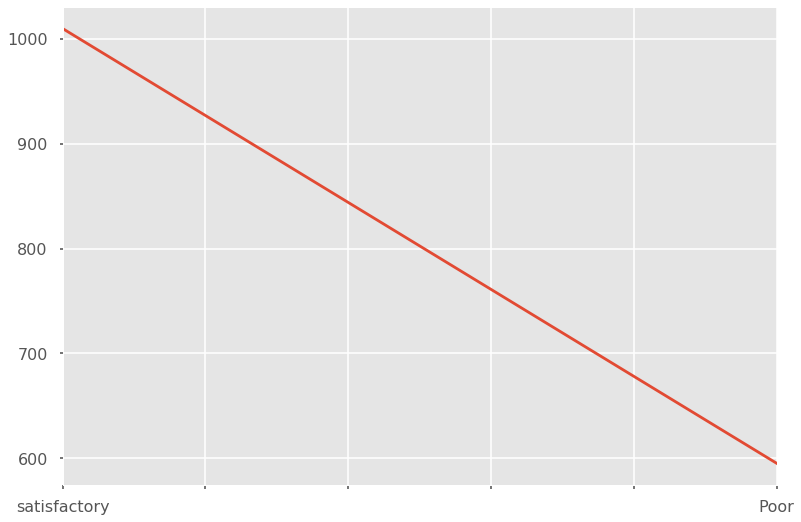

In [41]:
#change the style if needed
plt.style.use("seaborn-poster")
#plot the value count results in a form of a line
google["Stock Ranking"].value_counts().plot(kind = "line")

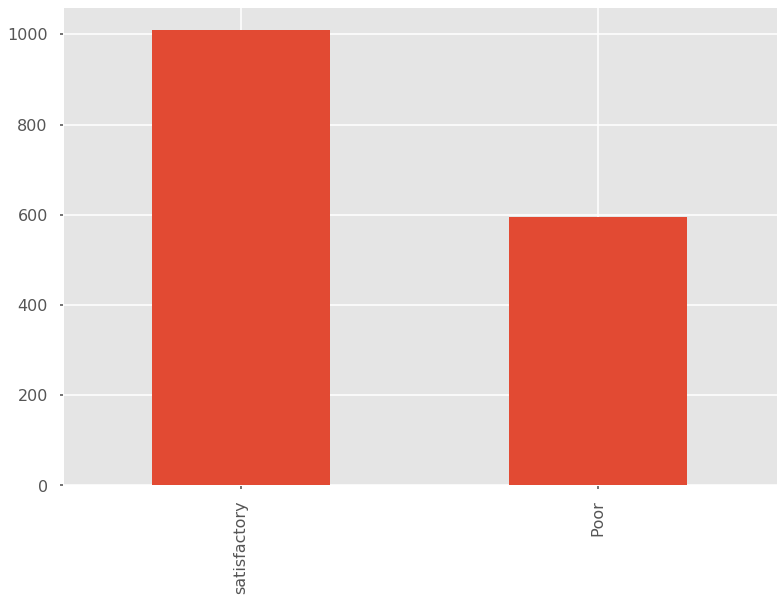

In [42]:
#plot in the form of a bar graph, which makes more sense in this case:
google["Stock Ranking"].value_counts().plot(kind = "bar")

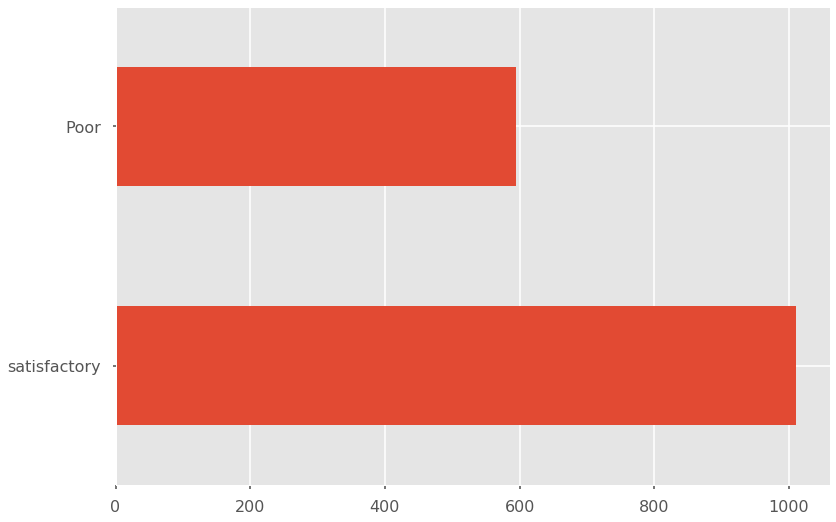

In [43]:
#plot in the form of a bar graph, in the horizantal form:
google["Stock Ranking"].value_counts().plot(kind = "barh")

## Pie Charts

In [47]:
apple = data.DataReader(name="AAPL", data_source = "yahoo", start="2012-01-01", end="2016-12-31")
apple.head(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,51.269413
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.544937
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,52.117188


In [62]:
#let's find the average stock price for apple
apple["Close"].mean
average = 93.3617192254726

In [63]:
def rank_performance2(stock_price):
    if stock_price >= average:
        return "Above Average"
    else:
        return "Below Average"

In [64]:
plt.style.use("ggplot")

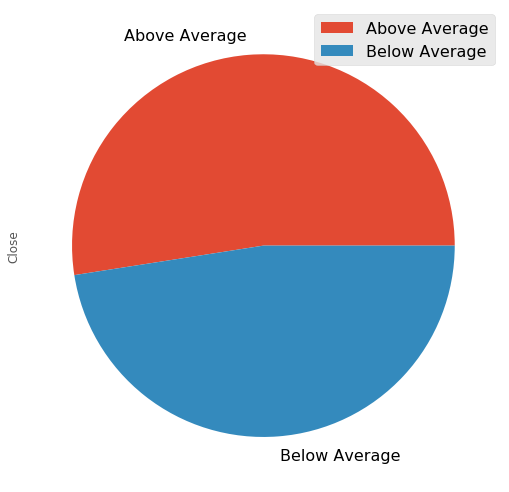

In [68]:
#create a pie chart based on the performace
apple["Close"].apply(rank_performance2).value_counts().plot(kind="pie", legend=True)

## Histograms

In [77]:
google = data.DataReader(name="GOOG", data_source="yahoo", start="2010-01-01", end="2016-12-31")
google.head(4)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,313.579620,310.954468,312.304413,312.204773,3927000.0,312.204773
2010-01-05,312.747742,309.609497,312.418976,310.829926,6031900.0,310.829926
2010-01-06,311.761444,302.047852,311.761444,302.994293,7987100.0,302.994293
2010-01-07,303.861053,295.218445,303.562164,295.940735,12876600.0,295.940735


In [78]:
#here we want to create buckets, to see how many times the stock was between 0-100, 100-200, etc
def custom_round(stock_price):
    return int(stock_price / 100.0) * 100

In [79]:
custom_round(89.34)

0

In [83]:
#so here we select the column, apply the costume fucntion, see how many of each range there is, and finally sort them
google["High"].apply(custom_round).value_counts().sort_index()

200    431
300    368
400    157
500    415
600    106
700    273
800     12
Name: High, dtype: int64

In [85]:
#to see how many buckets was created
google["High"].apply(custom_round).nunique()

7

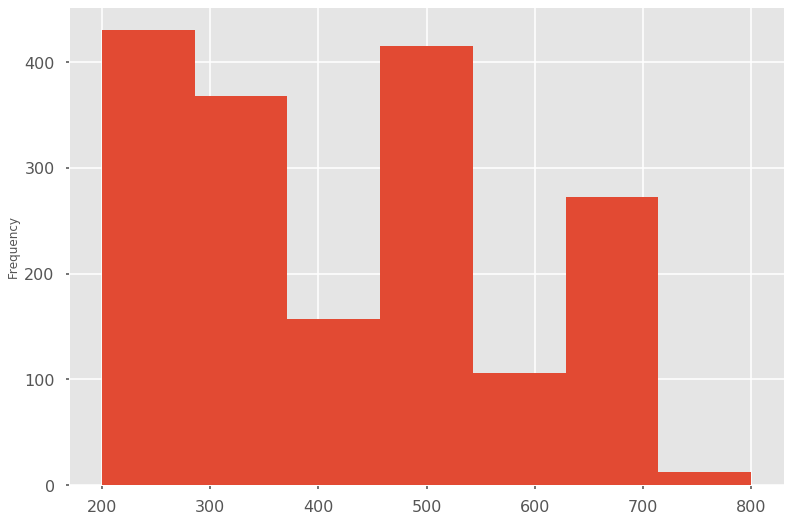

In [88]:
#plotting the histogram
google["High"].apply(custom_round).plot(kind="hist", bins = 7)

In [89]:
#so notice how x axis labels don't perfectly match the bars to fix this add the "bins" arguments to the plot